In [71]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import os

In [72]:
def read_file(file_name):
    grouped_data = defaultdict(list)
    grouped_data_new = defaultdict(list)
    with open(file_name, 'r') as file:
        lines = file.readlines()

        epoch = np.nan
        precision = np.nan
        recall = np.nan
        f_score = np.nan
        accuracy = np.nan
        g_mean = np.nan
        model = ''
        training_time = np.nan
        inference_time = np.nan
        balanced = False

        training_loss = defaultdict(list)

        new_data = False

        for line in lines:
            info = ''
            try:
                info = line.split(' - ')[1]
            except:
                continue
            
            if 'Model: ' in info:
                model = info.split('Model: ')[1].split(' ')[0]

            if 'train loss' in info:
                training_loss[int(re.findall(r'\d+', info)[0])].append(float(re.findall(r'\d+\.\d+', info)[0]))

            if 'Evaluation Results' in info:
                if '(completely new data)' in info:
                    new_data = True
                    model = info.split(' ')[0]
                if 'balanced' in info:
                    balanced = True
                epoch = int(re.findall(r'\d+', info.split(' with ')[1])[0])

            if 'Precision' in info:
                precision = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Recall' in info:
                recall = float(re.findall(r'\d+\.\d+', info)[0])
                
            if 'F-score' in info:
                f_score = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Accuracy' in info:
                accuracy = float(re.findall(r'\d+\.\d+', info)[0])

            if 'G-mean' in info:
                g_mean = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Training time' in info:
                training_time = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Inference time' in info:
                inference_time = float(re.findall(r'\d+\.\d+', info)[0])

            
            if not np.isnan(epoch) and not np.isnan(precision) and not np.isnan(recall) and not np.isnan(f_score) and not np.isnan(accuracy) and not np.isnan(g_mean):
                if new_data:
                    grouped_data_new[epoch].append({
                        'model': model,
                        'epoch': epoch,
                        'new_data': new_data,
                        'balanced': balanced,
                        'precision': precision,
                        'recall': recall,
                        'f_score': f_score,
                        'accuracy': accuracy,
                        'g_mean': g_mean,
                        'training_loss': training_loss,
                        'training_time': training_time,
                        'inference_time': inference_time,
                        'file_name': file_name
                    })
                else:
                    grouped_data[epoch].append({
                        'model': model,
                        'epoch': epoch,
                        'new_data': new_data,
                        'balanced': balanced,
                        'precision': precision,
                        'recall': recall,
                        'f_score': f_score,
                        'accuracy': accuracy,
                        'g_mean': g_mean,
                        'training_loss': training_loss,
                        'training_time': training_time,
                        'inference_time': inference_time,
                        'file_name': file_name
                    })
                epoch = np.nan
                precision = np.nan
                recall = np.nan
                f_score = np.nan
                accuracy = np.nan
                g_mean = np.nan
                training_loss = defaultdict(list)
                new_data = False
                balanced = False
        

    return grouped_data, grouped_data_new

In [73]:
# Initialize defaultdict to group data points per epoch
grouped_data = defaultdict(list)
grouped_data_testing = defaultdict(list)

log_files = [f for f in os.listdir('./logs') if f.endswith('.log')]

for log_file in log_files:
    file_data, file_new_data = read_file('./logs/' + log_file)

    for epoch, data in file_data.items():
        grouped_data[epoch].extend(data)

    for epoch, data in file_new_data.items():
        grouped_data_testing[epoch].extend(data)
    
    print(log_file, len(file_data))

training_log_2023-12-18_02-46-37.log 8
training_log_2023-12-20_02-21-38.log 1
training_log_2023-12-21_15-16-57.log 0
training_log_2023-12-21_20-31-14.log 8


In [74]:
# grouped_data, _ = read_file('./logs/training_log_2023-12-14_18-56-42.log')

In [75]:
# sort the grouped data by epoch
sorted_grouped_data = sorted(grouped_data.items(), key=lambda x: x[0])
# convert back into map
grouped_data = dict(sorted_grouped_data)

In [76]:
unique_epochs = np.array(list(grouped_data.keys()))
unique_epochs = np.array(unique_epochs)[~np.isnan(unique_epochs)]
print('Unique Epochs: ', unique_epochs)

Unique Epochs:  [1 2 3 4 5 6 7 8]


In [77]:
# remove results after epoch 8
# grouped_data = {k: v for k, v in grouped_data.items() if k <= 10}
unique_epochs = np.array(list(grouped_data.keys()))

In [78]:
# get a count of the number of data points per epoch for each metric
precision_count = []
recall_count = []
f_score_count = []
accuracy_count = []
g_mean_count = []

for epoch in unique_epochs:
    precision_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['precision'])]))
    recall_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['recall'])]))
    f_score_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['f_score'])]))
    accuracy_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['accuracy'])]))
    g_mean_count.append(len([x for x in grouped_data[epoch] if not np.isnan(x['g_mean'])]))

print('Precision Count: ', dict(zip(unique_epochs, precision_count)))
print('Recall Count: ', dict(zip(unique_epochs, recall_count)))
print('F-score Count: ', dict(zip(unique_epochs, f_score_count)))
print('Accuracy Count: ', dict(zip(unique_epochs, accuracy_count)))
print('G-mean Count: ', dict(zip(unique_epochs, g_mean_count)))

Precision Count:  {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}
Recall Count:  {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}
F-score Count:  {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}
Accuracy Count:  {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}
G-mean Count:  {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}


In [79]:
# Calculate the average per epoch for each metric
avg_precision = []
avg_recall = []
avg_f_score = []
avg_accuracy = []
avg_g_mean = []

# ignore nan values
for epoch in unique_epochs:
    avg_precision.append(np.nanmean([x['precision'] for x in grouped_data[epoch]]))
    avg_recall.append(np.nanmean([x['recall'] for x in grouped_data[epoch]]))
    avg_f_score.append(np.nanmean([x['f_score'] for x in grouped_data[epoch]]))
    avg_accuracy.append(np.nanmean([x['accuracy'] for x in grouped_data[epoch]]))
    avg_g_mean.append(np.nanmean([x['g_mean'] for x in grouped_data[epoch]]))


print('Average Precision: ', avg_precision)
print('Average Recall: ', avg_recall)
print('Average F-score: ', avg_f_score)
print('Average Accuracy: ', avg_accuracy)
print('Average G-mean: ', avg_g_mean)


Average Precision:  [0.796884906296671, 0.7803123086344153, 0.7685242839352429, 0.7363181935706283, 0.7331722122302158, 0.7247456877487837, 0.7577184849082659, 0.7515085291082377]
Average Recall:  [0.4978494623655914, 0.7578671328671329, 0.7779720279720279, 0.8692307692307693, 0.8638111888111888, 0.8604895104895105, 0.8491258741258741, 0.8438811188811188]
Average F-score:  [0.5745814637577054, 0.7687908295328485, 0.7731991192198805, 0.7891934883840263, 0.7924370750328045, 0.7861280788177339, 0.7991499366974137, 0.7920447696943607]
Average Accuracy:  [0.7594444444444445, 0.8241666666666667, 0.8233333333333333, 0.8058333333333333, 0.8200000000000001, 0.8141666666666667, 0.8283333333333334, 0.8200000000000001]
Average G-mean:  [0.5983071474336495, 0.7895718661655875, 0.7997908022740448, 0.8360098394804735, 0.8416147082184731, 0.8369973969766096, 0.8386516125053337, 0.8317588759031749]


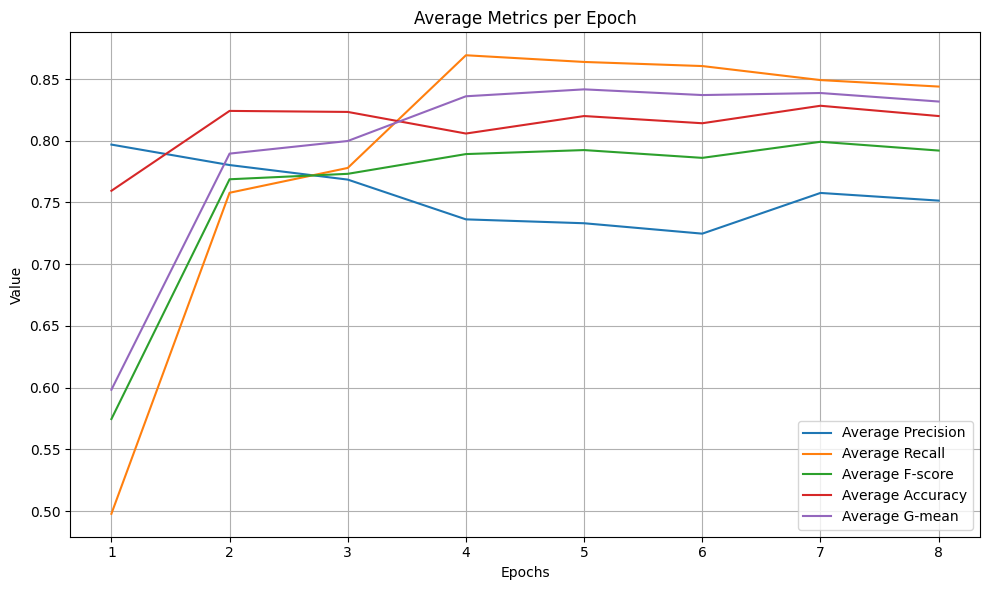

In [80]:
# Plotting
plt.figure(figsize=(10, 6))

# remove nan
avg_precision = np.array(avg_precision)[~np.isnan(avg_precision)]
avg_recall = np.array(avg_recall)[~np.isnan(avg_recall)]
avg_f_score = np.array(avg_f_score)[~np.isnan(avg_f_score)]
avg_accuracy = np.array(avg_accuracy)[~np.isnan(avg_accuracy)]
avg_g_mean = np.array(avg_g_mean)[~np.isnan(avg_g_mean)]


plt.plot(unique_epochs, avg_precision, label='Average Precision')
plt.plot(unique_epochs, avg_recall, label='Average Recall')
plt.plot(unique_epochs, avg_f_score, label='Average F-score')
plt.plot(unique_epochs, avg_accuracy, label='Average Accuracy')
plt.plot(unique_epochs, avg_g_mean, label='Average G-mean')

plt.title('Average Metrics per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# get the best per epoch
best_precision = []
best_recall = []
best_f_score = []
best_accuracy = []
best_g_mean = []

for epoch in unique_epochs:
    best_precision.append(np.nanmax([x['precision'] for x in grouped_data[epoch]]))
    best_recall.append(np.nanmax([x['recall'] for x in grouped_data[epoch]]))
    best_f_score.append(np.nanmax([x['f_score'] for x in grouped_data[epoch]]))
    best_accuracy.append(np.nanmax([x['accuracy'] for x in grouped_data[epoch]]))
    best_g_mean.append(np.nanmax([x['g_mean'] for x in grouped_data[epoch]]))

print('Best Precision: ', best_precision)
print('Best Recall: ', best_recall)
print('Best F-score: ', best_f_score)
print('Best Accuracy: ', best_accuracy)
print('Best G-mean: ', best_g_mean)

Best Precision:  [0.850909090909091, 0.9084507042253521, 0.9006849315068494, 0.911660777385159, 0.865625, 0.8637770897832817, 0.8986486486486487, 0.9100346020761245]
Best Recall:  [0.8181818181818182, 0.9020979020979021, 0.9195804195804196, 0.9020979020979021, 0.9685314685314685, 0.9755244755244755, 0.9300699300699301, 0.9195804195804196]
Best F-score:  [0.8342245989304814, 0.9052631578947369, 0.9100346020761246, 0.9068541300527241, 0.9141914191419143, 0.9162561576354679, 0.9140893470790379, 0.9147826086956521]
Best Accuracy:  [0.845, 0.91, 0.9133333333333333, 0.9116666666666666, 0.9133333333333333, 0.915, 0.9166666666666666, 0.9183333333333333]
Best G-mean:  [0.8314827937868807, 0.9060403362483874, 0.9164515534841162, 0.9068696639609175, 0.9405275512137189, 0.9447776961300977, 0.92334397846312, 0.9189566649093699]


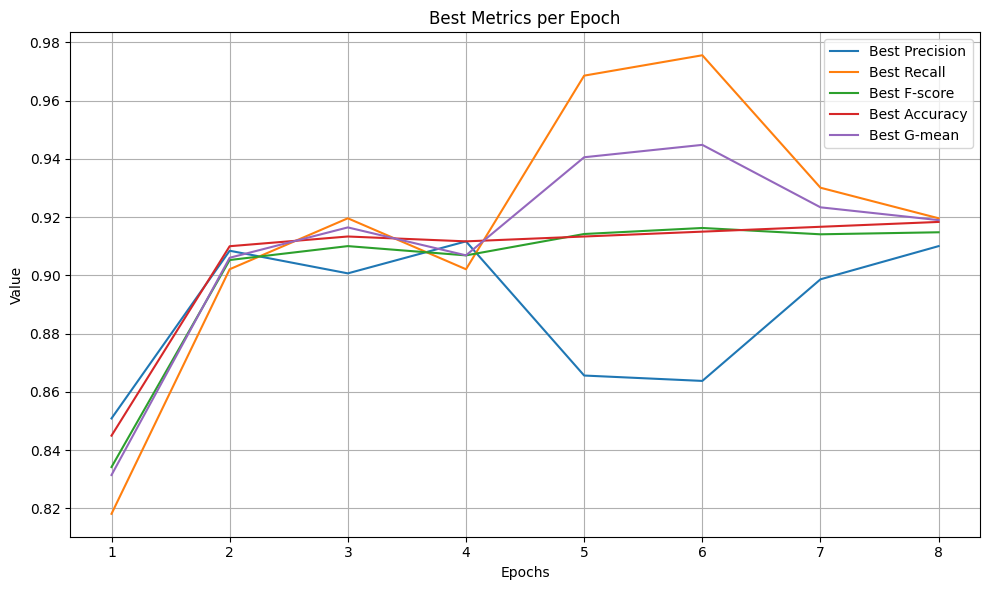

In [82]:
# Plotting
plt.figure(figsize=(10, 6))

# remove nan
best_precision = np.array(best_precision)[~np.isnan(best_precision)]
best_recall = np.array(best_recall)[~np.isnan(best_recall)]
best_f_score = np.array(best_f_score)[~np.isnan(best_f_score)]
best_accuracy = np.array(best_accuracy)[~np.isnan(best_accuracy)]
best_g_mean = np.array(best_g_mean)[~np.isnan(best_g_mean)]

plt.plot(unique_epochs, best_precision, label='Best Precision')
plt.plot(unique_epochs, best_recall, label='Best Recall')
plt.plot(unique_epochs, best_f_score, label='Best F-score')
plt.plot(unique_epochs, best_accuracy, label='Best Accuracy')
plt.plot(unique_epochs, best_g_mean, label='Best G-mean')

plt.title('Best Metrics per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [83]:
# Compare the average metrics for the new data
avg_precision_testing = []
avg_recall_testing = []
avg_f_score_testing = []
avg_accuracy_testing = []
avg_g_mean_testing = []

# ignore nan values

for epoch in unique_epochs:
    avg_precision_testing.append(np.nanmean([x['precision'] for x in grouped_data_testing[epoch]]))
    avg_recall_testing.append(np.nanmean([x['recall'] for x in grouped_data_testing[epoch]]))
    avg_f_score_testing.append(np.nanmean([x['f_score'] for x in grouped_data_testing[epoch]]))
    avg_accuracy_testing.append(np.nanmean([x['accuracy'] for x in grouped_data_testing[epoch]]))
    avg_g_mean_testing.append(np.nanmean([x['g_mean'] for x in grouped_data_testing[epoch]]))


print('Average Precision (Testing dataset): ', avg_precision_testing)
print('Average Recall (Testing dataset): ', avg_recall_testing)
print('Average F-score (Testing dataset): ', avg_f_score_testing)
print('Average Accuracy (Testing dataset): ', avg_accuracy_testing)
print('Average G-mean (Testing dataset): ', avg_g_mean_testing)

Average Precision (Testing dataset):  [0.569493787958914, 0.5091536892843901, 0.49614978409379557, 0.5104951387547485, 0.49660053608812194, 0.5118212506587385, 0.5327235772357723, 0.47128896648754937]
Average Recall (Testing dataset):  [0.24021675010199103, 0.5945822289536792, 0.6816988514451596, 0.6662154486936767, 0.7982834784803736, 0.8152183516344819, 0.7393695569859902, 0.619929319702133]
Average F-score (Testing dataset):  [0.3029988894594547, 0.5482540684671131, 0.5743076206513562, 0.5697237474262182, 0.6117823090860486, 0.6287843887133805, 0.6186259867719224, 0.5250077079839675]
Average Accuracy (Testing dataset):  [0.49583333333333335, 0.5125, 0.4975, 0.524375, 0.49624999999999997, 0.52125, 0.55, 0.48812500000000003]
Average G-mean (Testing dataset):  [0.3311705317140617, 0.5520167148316735, 0.5822861244595371, 0.5858199183700397, 0.6293573830568224, 0.6518619424529262, 0.6371036196462543, 0.5427931929026228]


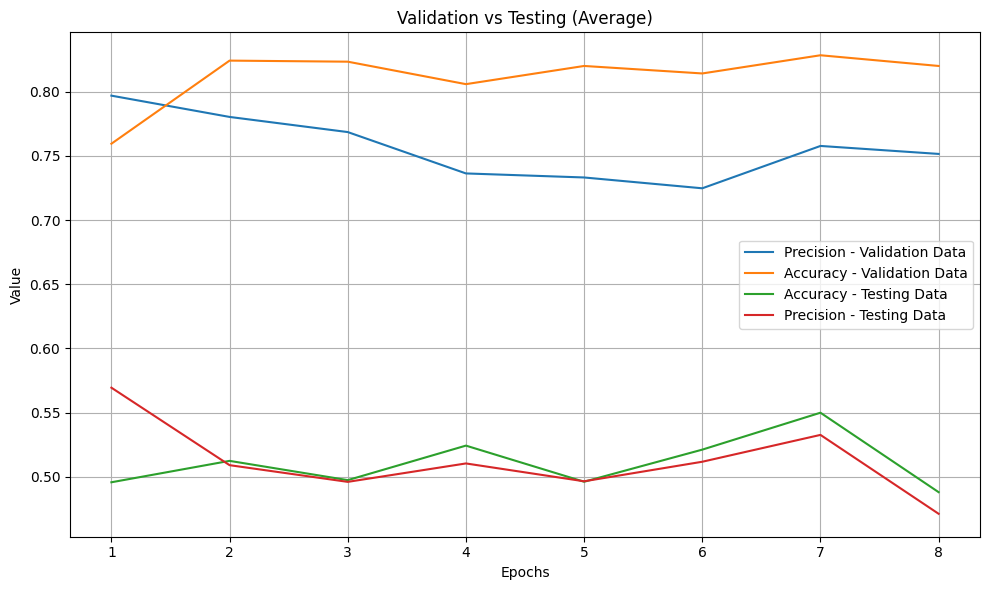

In [84]:
# Plotting new data vs old data
plt.figure(figsize=(10, 6))

# remove nan
avg_precision_testing = np.array(avg_precision_testing)[~np.isnan(avg_precision_testing)]
avg_recall_testing = np.array(avg_recall_testing)[~np.isnan(avg_recall_testing)]
avg_f_score_testing = np.array(avg_f_score_testing)[~np.isnan(avg_f_score_testing)]
avg_accuracy_testing = np.array(avg_accuracy_testing)[~np.isnan(avg_accuracy_testing)]
avg_g_mean_testing = np.array(avg_g_mean_testing)[~np.isnan(avg_g_mean_testing)]

plt.plot(unique_epochs, avg_precision, label='Precision - Validation Data')
plt.plot(unique_epochs, avg_accuracy, label='Accuracy - Validation Data')

plt.plot(unique_epochs, avg_accuracy_testing, label='Accuracy - Testing Data')
plt.plot(unique_epochs, avg_precision_testing, label='Precision - Testing Data')

plt.title('Validation vs Testing (Average)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# best metrics for new data
best_precision_testing = []
best_recall_testing = []
best_f_score_testing = []
best_accuracy_testing = []
best_g_mean_testing = []
best_model_testing = []

for epoch in unique_epochs:
    best_precision_testing.append(np.nanmax([x['precision'] for x in grouped_data_testing[epoch]]))
    best_recall_testing.append(np.nanmax([x['recall'] for x in grouped_data_testing[epoch]]))
    best_f_score_testing.append(np.nanmax([x['f_score'] for x in grouped_data_testing[epoch]]))
    best_accuracy_testing.append(np.nanmax([x['accuracy'] for x in grouped_data_testing[epoch]]))
    best_g_mean_testing.append(np.nanmax([x['g_mean'] for x in grouped_data_testing[epoch]]))
    best_model_testing.append([x['model'] for x in grouped_data_testing[epoch] if x['g_mean'] == np.nanmax([x['g_mean'] for x in grouped_data_testing[epoch]])][0])

print('Best Precision (Testing dataset): ', best_precision_testing)
print('Best Recall (Testing dataset): ', best_recall_testing)
print('Best F-score (Testing dataset): ', best_f_score_testing)
print('Best Accuracy (Testing dataset): ', best_accuracy_testing)
print('Best G-mean (Testing dataset): ', best_g_mean_testing)

Best Precision (Testing dataset):  [0.6538461538461539, 0.5129310344827587, 0.51138353765324, 0.5344311377245509, 0.5055467511885895, 0.5260736196319018, 0.551219512195122, 0.5263929618768328]
Best Recall (Testing dataset):  [0.4263157894736842, 0.618421052631579, 0.7002398081534772, 0.8561151079136691, 0.8315789473684211, 0.8225419664268585, 0.8129496402877698, 0.8609112709832134]
Best F-score (Testing dataset):  [0.4314247669773635, 0.5562130177514794, 0.5910931174089069, 0.6580645161290322, 0.6147859922178988, 0.6417212347988774, 0.6569767441860466, 0.6533212010919017]
Best Accuracy (Testing dataset):  [0.51875, 0.53125, 0.5, 0.53625, 0.505, 0.52125, 0.5575, 0.52375]
Best G-mean (Testing dataset):  [0.4458359976965804, 0.5731807605027635, 0.5887433269566383, 0.6775630794388852, 0.6480334624238571, 0.6547900426854397, 0.673215733966781, 0.671492574923549]


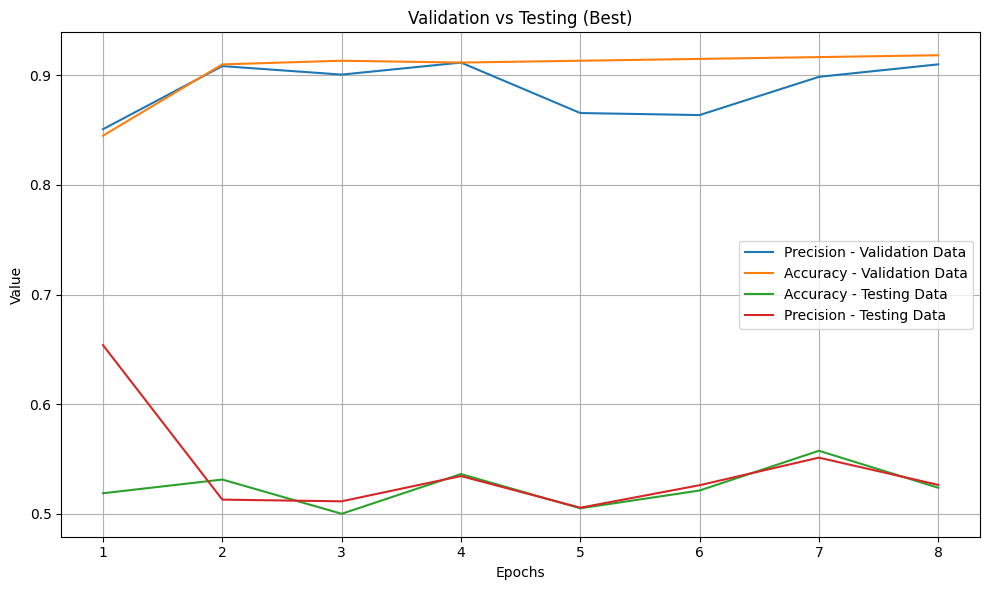

In [86]:
# Plotting new data vs old data
plt.figure(figsize=(10, 6))

# remove nan
best_precision_testing = np.array(best_precision_testing)[~np.isnan(best_precision_testing)]
best_recall_testing = np.array(best_recall_testing)[~np.isnan(best_recall_testing)]
best_f_score_testing = np.array(best_f_score_testing)[~np.isnan(best_f_score_testing)]
best_accuracy_testing = np.array(best_accuracy_testing)[~np.isnan(best_accuracy_testing)]
best_g_mean_testing = np.array(best_g_mean_testing)[~np.isnan(best_g_mean_testing)]

plt.plot(unique_epochs, best_precision, label='Precision - Validation Data')
plt.plot(unique_epochs, best_accuracy, label='Accuracy - Validation Data')

plt.plot(unique_epochs, best_accuracy_testing, label='Accuracy - Testing Data')
plt.plot(unique_epochs, best_precision_testing, label='Precision - Testing Data')

plt.title('Validation vs Testing (Best)')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# graph the training loss
average_training_loss = []
average_training_time = []
average_inference_time = []

for epoch in unique_epochs:
  epoch_loss = [np.nanmean(x['training_loss'][epoch]) for x in grouped_data[epoch] if epoch in x['training_loss']]
  if epoch_loss:
    average_training_loss.append(np.nanmean(epoch_loss))
  else:
    average_training_loss.append(np.nan)
  average_training_time.append(np.nanmean([x['training_time'] for x in grouped_data[epoch]]))
  average_inference_time.append(np.nanmean([x['inference_time'] for x in grouped_data[epoch]]))

print('Average Training Loss: ', average_training_loss)
print('Average Training Time: ', average_training_time)
print('Average Inference Time: ', average_inference_time)

Average Training Loss:  [0.5553, 0.350691, 0.220407, 0.106321, 0.09007899999999999, 0.054829, 0.042928, 0.031191]
Average Training Time:  [716.3525500297546, 1117.583186507225, 1632.8687607049942, 2166.82280421257, 2697.922612786293, 3236.6030502319336, 3777.8438103199005, 4283.289652109146]
Average Inference Time:  [7.509838183720906, 6.896779775619507, 5.618661165237427, 5.614354610443115, 5.5686482191085815, 5.619291424751282, 5.6206172704696655, 5.784717798233032]


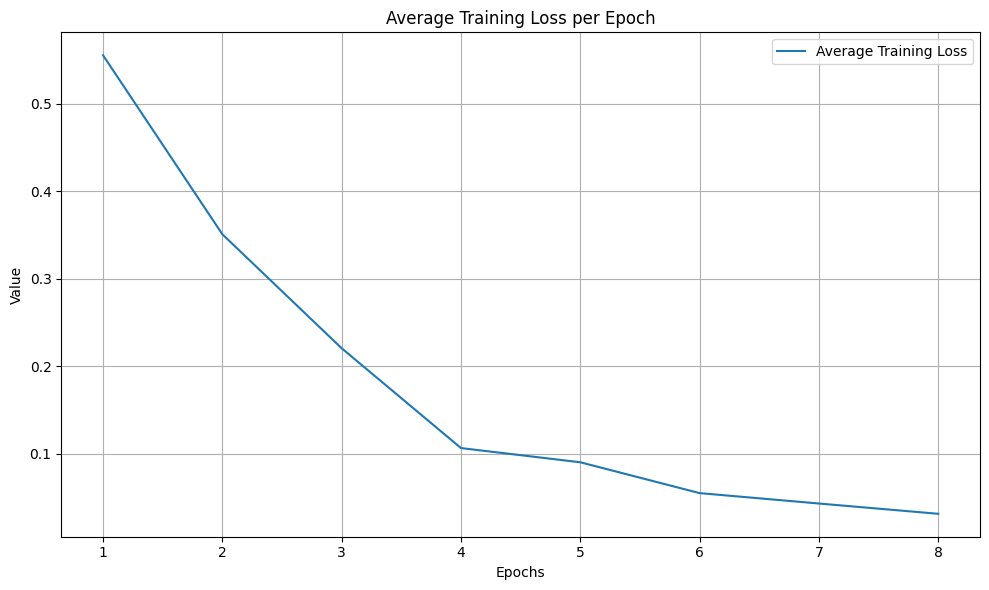

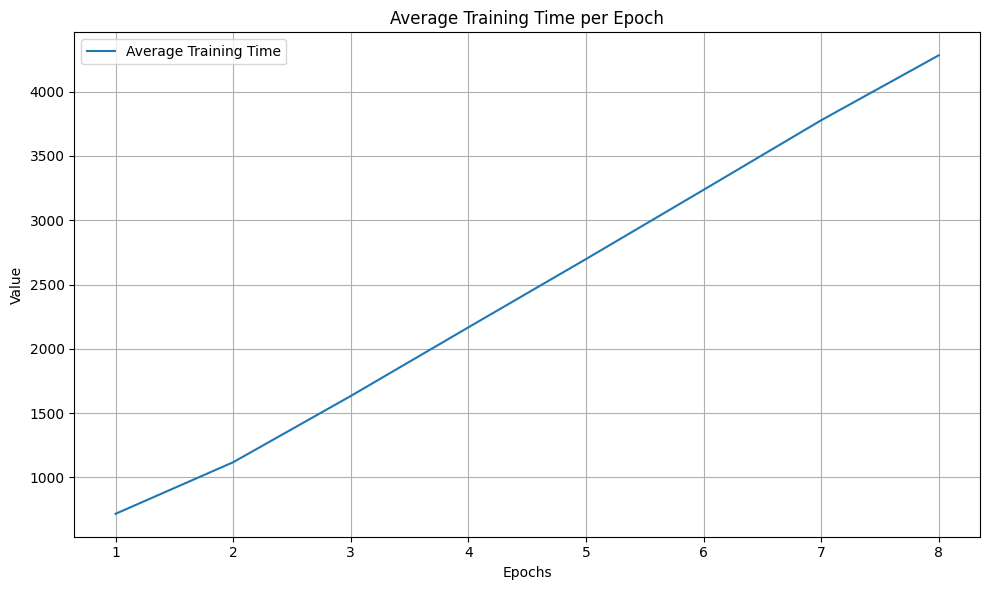

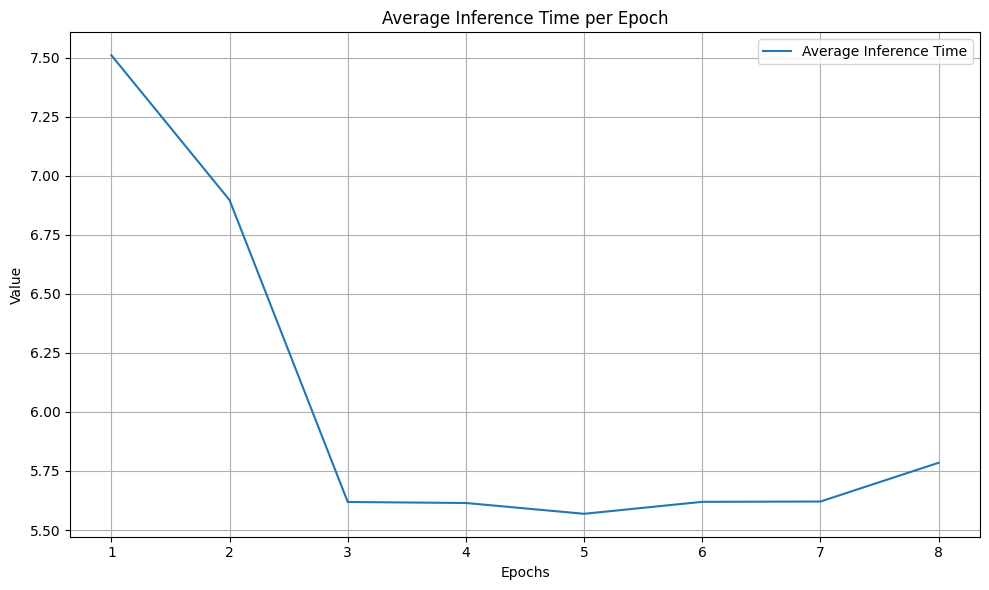

In [88]:
# make 3 charts, one for training loss, one for training time, one for inference time
plt.figure(figsize=(10, 6))

# remove nan
average_training_loss = np.array(average_training_loss)[~np.isnan(average_training_loss)]
average_training_time = np.array(average_training_time)[~np.isnan(average_training_time)]
average_inference_time = np.array(average_inference_time)[~np.isnan(average_inference_time)]

plt.plot(unique_epochs, average_training_loss, label='Average Training Loss')
plt.title('Average Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(unique_epochs, average_training_time, label='Average Training Time')
plt.title('Average Training Time per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(unique_epochs, average_inference_time, label='Average Inference Time')
plt.title('Average Inference Time per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(unique_epochs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
import pandas as pd

# create a dataframe for each metric
precision_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': precision_count, 'Average Precision (Validation)': avg_precision, 'Best Precision (Validation)': best_precision, 'Average Precision (Testing)': avg_precision_testing, 'Best Precision (Testing)': best_precision_testing})
recall_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': recall_count, 'Average Recall (Validation)': avg_recall, 'Best Recall (Validation)': best_recall, 'Average Recall (Testing)': avg_recall_testing, 'Best Recall (Testing)': best_recall_testing})
f_score_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': f_score_count, 'Average F-score (Validation)': avg_f_score, 'Best F-score (Validation)': best_f_score, 'Average F-score (Testing)': avg_f_score_testing, 'Best F-score (Testing)': best_f_score_testing})
accuracy_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': accuracy_count, 'Average Accuracy (Validation)': avg_accuracy, 'Best Accuracy (Validation)': best_accuracy, 'Average Accuracy (Testing)': avg_accuracy_testing, 'Best Accuracy (Testing)': best_accuracy_testing})
g_mean_df = pd.DataFrame({'Epoch': unique_epochs, 'Number of iterations': g_mean_count, 'Average G-mean (Validation)': avg_g_mean, 'Best G-mean (Validation)': best_g_mean, 'Average G-mean (Testing)': avg_g_mean_testing, 'Best G-mean (Testing)': best_g_mean_testing})
training_loss_df = pd.DataFrame({'Epoch': unique_epochs, 'Average Training Loss': average_training_loss})

# create a dataframe for all the data
all_data = []
for epoch in unique_epochs:
    for data in grouped_data[epoch]:
        # add the epoch to the data
        data['epoch'] = epoch
        # convert the training loss to a list if it isn't already
        if not isinstance(data['training_loss'], list):
            data['training_loss'] = [x[0] for _, x in data['training_loss'].items()]
        all_data.append(data)
    for data in grouped_data_new[epoch]:
        # add the epoch to the data
        data['epoch'] = epoch
        # convert the training loss to a list if it isn't already
        if not isinstance(data['training_loss'], list):
            data['training_loss'] = [x[0] for _, x in data['training_loss'].items()]
        all_data.append(data)
    

all_data_df = pd.DataFrame(all_data)

In [90]:
# export the data to excel
import xlsxwriter

epoch_rows = len(unique_epochs) + 1

def training_loss_chart():
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'Average Training Loss',
        'categories': f'=Training Loss!$A$2:$A${epoch_rows}',
        'values': f'=Training Loss!$B$2:B${epoch_rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },
    })

    chart.set_title({'name': 'Average Training Loss'})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    worksheet = writer.sheets['Training Loss']
    worksheet.insert_chart(f'B{epoch_rows + 3}', chart)


def add_chart(sheet_name, show_best=True, show_testing=True):
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'Average {sheet_name} (Validation)',
        'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
        'values': f'={sheet_name}!$C$2:C${epoch_rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },
    })
    if show_best:
        chart.add_series({
            'name': f'Best {sheet_name} (Validation)',
            'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
            'values': f'={sheet_name}!$D$2:$D${epoch_rows}',
            'line': {
                'color': 'red', 
                'width': 1.5
            }
        })
    if show_testing:
        chart.add_series({
            'name': f'Average {sheet_name} (Testing)',
            'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
            'values': f'={sheet_name}!$E$2:$E${epoch_rows}',
            'line': {
                'color': 'green', 
                'width': 1.5
            }
        })
        if show_best:
            chart.add_series({
                'name': f'Best {sheet_name} (Testing)',
                'categories': f'={sheet_name}!$A$2:$A${epoch_rows}',
                'values': f'={sheet_name}!$F$2:$F${epoch_rows}',
                'line': {
                    'color': 'orange', 
                    'width': 1.5
                }
            })
    chart.set_title({'name': sheet_name})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    worksheet = writer.sheets[sheet_name]
    worksheet.insert_chart(f'B{epoch_rows + 3}', chart)

def set_column_widths(sheet_name):
    worksheet = writer.sheets[sheet_name]
    worksheet.set_column('B:B', 20)
    worksheet.set_column('C:C', 30)
    worksheet.set_column('D:D', 30)
    worksheet.set_column('E:E', 25)
    worksheet.set_column('F:F', 25)
    


def set_all_data_widths():
    # set the columns for the all data sheet
    worksheet = writer.sheets['All Data']
    worksheet.set_column('A:A', 25)
    worksheet.set_column('B:B', 10)
    worksheet.set_column('C:C', 10)
    worksheet.set_column('D:D', 12)
    worksheet.set_column('E:E', 12)
    worksheet.set_column('F:F', 12)
    worksheet.set_column('G:G', 12)
    worksheet.set_column('H:H', 12)
    worksheet.set_column('I:I', 40)
    worksheet.set_column('J:J', 15)
    worksheet.set_column('K:K', 15)
    worksheet.set_column('L:L', 20)
    worksheet.set_column('M:M', 65)
    worksheet.set_column('N:N', 25)

def all_metrics_chart(type = 'Average', cell='A1'):
    rows = f'$D$2:$D${epoch_rows}' if type == 'Best' else f'$C$2:$C${epoch_rows}'
    # create a chart for the the average of all metrics in a new sheet
    chart = workbook.add_chart({'type': 'line'})
    chart.add_series({
        'name': f'{type} Precision',
        'categories': f'=Precision!$A$2:$A${rows}',
        'values': f'=Precision!{rows}',
        'line': {
            'color': 'blue', 
            'width': 1.5
        },

    })
    chart.add_series({
        'name': f'{type} Recall',
        'categories': f'=Recall!$A$2:$A${rows}',
        'values': f'=Recall!{rows}',
        'line': {
            'color': 'red', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} F-score',
        'categories': f'=F-score!$A$2:$A${rows}',
        'values': f'=F-score!{rows}',
        'line': {
            'color': 'green', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} Accuracy',
        'categories': f'=Accuracy!$A$2:$A${rows}',
        'values': f'=Accuracy!{rows}',
        'line': {
            'color': 'orange', 
            'width': 1.5
        }
    })
    chart.add_series({
        'name': f'{type} G-mean',
        'categories': f'=G-mean!$A$2:$A${rows}',
        'values': f'=G-mean!{rows}',
        'line': {
            'color': 'purple', 
            'width': 1.5
        }
    })

    chart.set_title({'name': f'{type} Metrics'})
    chart.set_x_axis({'name': 'Epochs'})
    chart.set_y_axis({'name': 'Value'})
    chart.set_style(10)
    chart.set_size({'width': 900, 'height': 600})
    # create a new sheet for the chart
    worksheet = writer.sheets['All Metrics']
    worksheet.insert_chart(cell, chart)



# export to excel
with pd.ExcelWriter('baseline_detection_results.xlsx', engine='xlsxwriter') as writer:
    precision_df.to_excel(writer, index=False, sheet_name='Precision')
    recall_df.to_excel(writer, index=False, sheet_name='Recall')
    f_score_df.to_excel(writer, index=False, sheet_name='F-score')
    accuracy_df.to_excel(writer, index=False, sheet_name='Accuracy')
    g_mean_df.to_excel(writer, index=False, sheet_name='G-mean')
    training_loss_df.to_excel(writer, index=False, sheet_name='Training Loss')
    all_data_df.to_excel(writer, index=False, sheet_name='All Data')

    # create a workbook
    workbook = writer.book

    # create a chart for the average and best of each metric in each sheet
    add_chart('Precision')
    add_chart('Recall')
    add_chart('F-score')
    add_chart('Accuracy')
    add_chart('G-mean')
    add_chart('Training Loss', show_best=False, show_testing=False)

    # set the column width for each sheet
    set_column_widths('Precision')
    set_column_widths('Recall')
    set_column_widths('F-score')
    set_column_widths('Accuracy')
    set_column_widths('G-mean')
    set_column_widths('Training Loss')

    # create a chart for the training loss
    training_loss_chart()

    # set the column width for the all data sheet
    set_all_data_widths()

    # create a chart for the the average of all metrics in a new sheet
    workbook.add_worksheet('All Metrics')
    all_metrics_chart(type='Average', cell='B2')
    all_metrics_chart(type='Best', cell='B33')




d:\Projects\School\CSI4900\Fake-News-Detection\.venv\Lib\site-packages\xlsxwriter\chart.py:855: UserWarning: Sheetname in '=Training Loss!$A$2:$A$9' contains spaces but isn't quoted. This may cause errors in Excel.
  warn(
d:\Projects\School\CSI4900\Fake-News-Detection\.venv\Lib\site-packages\xlsxwriter\chart.py:855: UserWarning: Sheetname in '=Training Loss!$B$2:B$9' contains spaces but isn't quoted. This may cause errors in Excel.
  warn(
